In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
p=1/2
q=3/4

In [4]:
#Trajectoire de la chaîne X
def traj(m,X0):
    X=[X0]
    P=np.diag(q*(1-p)*np.ones(m),-1)+np.diag((q*p+(1-p)*(1-q))*np.ones(m+1))+np.diag(p*(1-q)*np.ones(m),1)
    P[0,0]=1-p
    P[0,1]=p
    for i in range (m):
        X.append(np.random.choice(np.arange(m+1),p=P[X[i],:]))
    return X

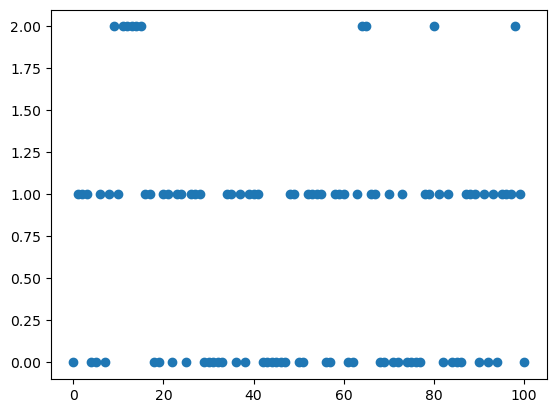

In [5]:
# X démarre dans l'état 0
x0=0
n=100
T=traj(n,x0)
plt.plot(np.arange(n+1),T,'o')

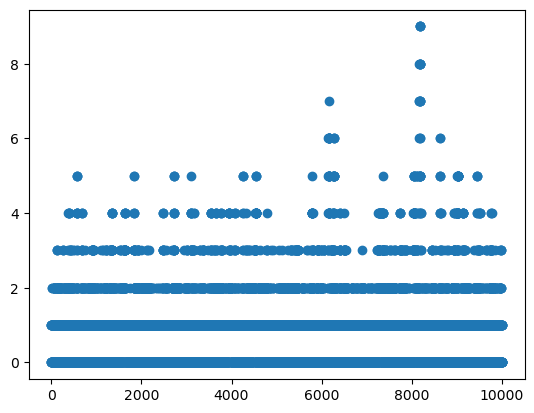

In [6]:
#Trajectoire de longueur 10000
x0=0
n=10000
T=traj(n,x0)
plt.plot(np.arange(n+1),traj(n,x0),'o')

In [7]:
#Approximation de π_2
alpha=p*(1-q)/((1-p)*q)
Pi2=alpha**2*((1-alpha)/(alpha+(1-alpha)*(1-q)))
pii=T.count(2)/n
print ('π_2 exacte :',Pi2)
print ('π_2 approchée :', pii)

π_2 exacte : 0.14814814814814817
π_2 approchée : 0.1443


**Système est de capacité finie K**

In [8]:
K=3
p=1/2
q=3/5
P=np.diag(q*(1-p)*np.ones(K),-1)+np.diag((q*p+(1-p)*(1-q))*np.ones(K+1))+np.diag(p*(1-q)*np.ones(K),1)
P[0,0]=1-p
P[0,1]=p
P[-1,-1]=1-p
P[-1,K-1]=p
#Trajectoire de la chaîne X
def traj(X0,m):
    X=[X0]
    for i in range (m):
        X.append(np.random.choice(np.arange(K+1),p=P[X[i],:]))
    return X

In [9]:
#verifier que c'est une matrice stochastique
[sum(P[i,:]) for i in range(K+1)]

[1.0, 1.0, 1.0, 1.0]

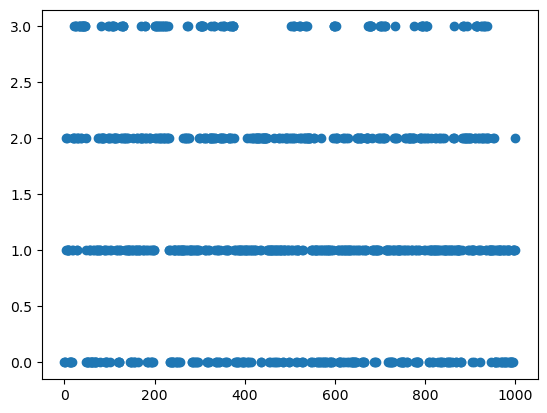

In [10]:
# X démarre dans l'état 0
x0=0
n=1000
T=traj(x0,n)
plt.scatter(np.arange(n+1),traj(x0,n))

1.0


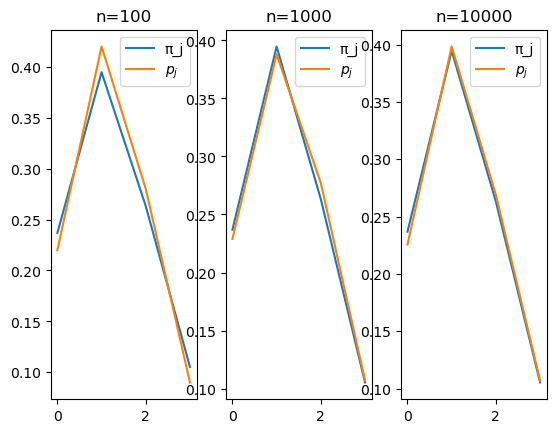

In [11]:
#Calcul de la Loi invariante explicite π_j
pi0=9/38
Pi=[1,5/3,10/9,4/9]
print(sum(Pi)*9/38)
Pi=[pi0,5/3*pi0,10/9*pi0,4/9*pi0]
#Calcul approché de p_j (n) pour diff valeurs de n
T=traj(x0,100)
pi1=[T.count(i)/100 for i in range (K+1)]
T=traj(x0,1000)
pi2=[T.count(i)/1000 for i in range (K+1)]
T=traj(x0,10000)
pi3=[T.count(i)/10000 for i in range (K+1)]
#Comparer graphiquement les π_j avec les p_j 
plt.subplot(131)
plt.plot(np.arange(K+1),Pi,label='π_j')
plt.plot(np.arange(K+1),pi1,label='$p_j$')
plt.title('n=100')
plt.legend()
plt.subplot(132)
plt.plot(np.arange(K+1),Pi,label='π_j')
plt.plot(np.arange(K+1),pi2,label='$p_j$')
plt.legend()
plt.title('n=1000')
plt.subplot(133)
plt.plot(np.arange(K+1),Pi,label='π_j')
plt.plot(np.arange(K+1),pi3,label='$p_j$')
plt.legend()
plt.title('n=10000')
plt.show()

**Temps de séjour**

Soit $D_i$ une variable aléatoire representant le temps de séjour dans l'état i , i.e. $D_i=d$ signifie que le système reste dans l'état i d fois avant de la quitter.


\begin{split}
P(D_i=d) & = P(X_0=i,X_1=i, ...,X_{d-1}=i,X_d \neq i) \\[3mm]
& = P(X_{d-1}=i/X_{d-2}=i)...P(X_1=i/X_0=i)P(X_d \neq i /X_{d-1}=i)\\[3mm]
& = K(i,i)^{d-1}(1-P(X_d = i /X_{d-1}=i)\\[3mm]
& = K(i,i)^{d-1}(1-K(i,i)
\end{split}

Alors $D_i$ suit une loi géometrique de paramètre $K(i,i)$

Donc le tempsmoyen de séjour dans l'état $i$ est $E[D_i]=\frac{1}{1-K(i,i)}$

In [12]:
#Approximation du temps moyen de séjour
ts=1/(1-P[3,3])
print (ts)

2.0
